In [5]:
pip install citipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.7/557.7 kB 6.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=5895045d64f7f1d0432b2ab8a70ed9a6bad5310cccc0841b3eedb36312af0906
  Stored in directory: /Users/razvan/Library/Caches/pip/wheels/d9/dd/68/8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create url for query with metric units and city at the end
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="


In [4]:
query_url

'http://api.openweathermap.org/data/2.5/weather?id=524901&appid=746e85efe221a8e8e5ff4bba2d48cfc5&units=imperial&q='

In [5]:
# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City found: {city}")
    except:
        print(f"City NOT found: {city}")

City found: juneau
City found: paamiut
City found: ponta do sol
City NOT found: saleaula
City found: albany
City found: cape town
City found: kapaa
City found: bull savanna
City found: bluff
City found: shingu
City NOT found: lolua
City found: souillac
City found: cidreira
City found: krasnoselkup
City found: yellowknife
City found: praia
City found: severnyy-kospashskiy
City found: klaksvik
City found: ixtapa
City found: hithadhoo
City found: mataura
City found: busselton
City found: namibe
City found: banda aceh
City found: coos bay
City found: thinadhoo
City found: fortuna
City found: rikitea
City found: mana
City found: kodiak
City found: thompson
City found: abu dhabi
City found: aklavik
City found: mount gambier
City found: el tigre
City found: victor harbor
City found: lebu
City found: cabo san lucas
City found: tuktoyaktuk
City found: ushuaia
City found: ponta delgada
City found: varna
City NOT found: taolanaro
City found: azad shahr
City found: puerto ayora
City found: vestman

City found: santa isabel do rio negro
City found: kawalu
City found: subtanjalla
City found: agronom
City found: kholodnyy
City found: moorhead
City found: sitka
City found: caraz
City found: northam
City NOT found: jinchengjiang
City found: patur
City found: port hedland
City found: port hawkesbury
City found: ust-nera
City found: nouadhibou
City found: adrar
City found: vestmanna
City found: uyuni
City found: lingao
City found: hermiston
City found: komsomolskiy
City found: gao
City found: batemans bay
City found: lagos
City found: jumla
City found: wahiawa
City NOT found: tasbuget
City found: esperance
City found: honiara
City found: petropavlovsk-kamchatskiy
City found: tiksi
City found: lazaro cardenas
City NOT found: meyungs
City found: cayenne
City found: luderitz
City found: ulladulla
City found: lazarev
City found: maloy
City found: sidvokodvo
City found: kismayo
City found: ilo
City found: contamana
City found: zwedru
City found: leningradskiy
City found: nemuro
City found: s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
Details_df = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [7]:
Details_df.to_csv('/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Details_df.csv', index = False)

In [8]:
Details_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,juneau,US,52.11,100,100,14.97,58.3019,-134.4197,1665250442
1,paamiut,GL,34.59,68,11,12.84,61.9940,-49.6678,1665250442
2,ponta do sol,PT,75.13,65,28,4.92,32.6667,-17.1000,1665250442
3,albany,US,52.65,56,6,1.99,42.6001,-73.9662,1665250442
4,cape town,ZA,63.27,75,20,25.32,-33.9258,18.4232,1665250428


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
very_humid_df = Details_df[(Details_df['Humidity'] > 100)]
very_humid_df

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.
very_humid_df.index

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
no_humidity_data = Details_df.join(very_humid_df, how='outer', lsuffix='_left', rsuffix='_right')
no_humidity_data = Details_df.merge(very_humid_df).query('index!=index')

In [12]:
clean_city_data = Details_df[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]
clean_city_data

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,juneau,US,58.3019,52.11,100,100,14.97,1665250442
1,paamiut,GL,61.9940,34.59,68,11,12.84,1665250442
2,ponta do sol,PT,32.6667,75.13,65,28,4.92,1665250442
3,albany,US,42.6001,52.65,56,6,1.99,1665250442
4,cape town,ZA,-33.9258,63.27,75,20,25.32,1665250428
...,...,...,...,...,...,...,...,...
556,kenai,US,60.5544,48.15,98,100,3.44,1665250529
557,portknockie,GB,57.7025,55.26,75,95,5.99,1665250529
558,cap malheureux,MU,-19.9842,71.47,64,26,5.01,1665250240
559,kavieng,PG,-2.5744,82.47,72,41,17.31,1665250529


In [13]:
clean_city_data.to_csv('/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/clean_city_data.csv', index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

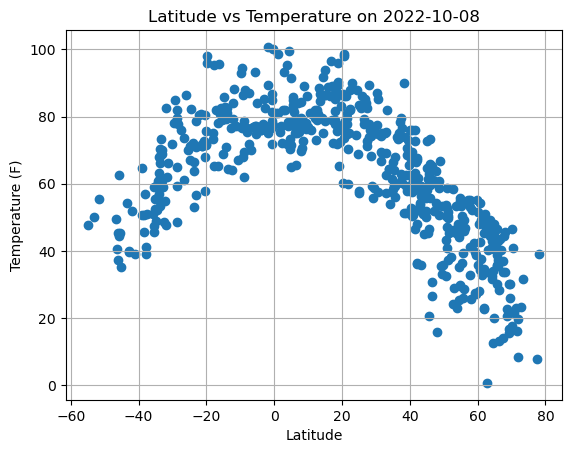

In [14]:
#format the max date in the dataset as "runDate" for graph titles
endRunDate = clean_city_data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = clean_city_data["Latitude"]
y = clean_city_data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Latitude vs Temperature on {runDate}.png')
plt.show()


Observations:
This graph shows random cities' temperatures vs the latitude of where they are positioned. As it can be seen, the temperatures increase as you go nearer the Equator (latitude 0) and decreases the further away from that point you go.The graph also shows that the difference in maximum temeperatures between left and right of the Equator is not that big, because it is autums in the northern hemisphere and spring in the southern part.

## Latitude vs. Humidity Plot

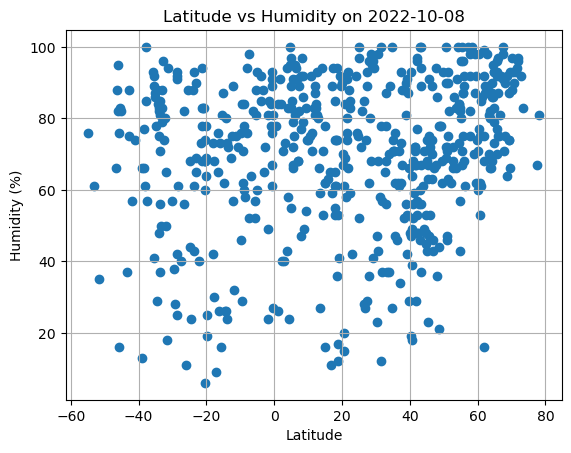

In [15]:
H = clean_city_data["Humidity"]
plt.scatter(x,H)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Latitude vs Humidity on {runDate}.png')
plt.show()

The graph maps random cities' humidity vs their latitude.

The result doesn't show any special correlation between the 2 plotted points (latitude and humidity)

## Latitude vs. Cloudiness Plot

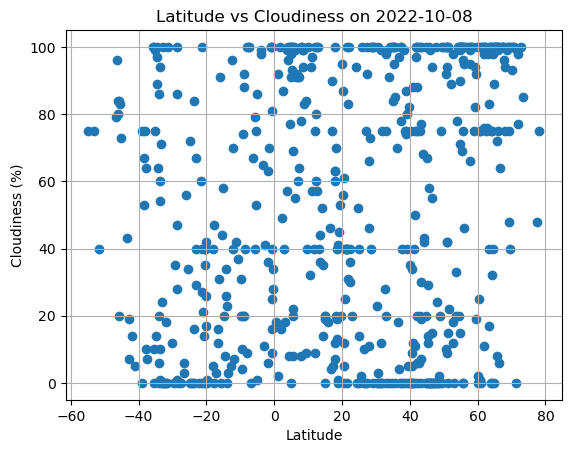

In [16]:
C = clean_city_data["Cloudiness"]
plt.scatter(x,C)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Latitude vs Cloudiness on {runDate}.png')
plt.show()

The scatter plot shows randomly selected cities' cloudiness percent against their latitude.

The result reveals no significant correlation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

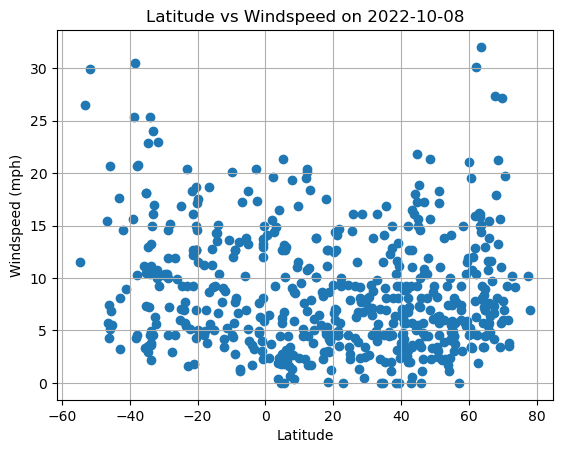

In [17]:
W = clean_city_data["Windspeed"]
plt.scatter(x,W)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Latitude vs Windspeed on {runDate}.png')
plt.show()

Observations:

The scatter plot shows random cities' windspeed plotted agains their latitude on this particular day. From the data observed, it can't be observed any correlation between these 2 value sets.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [19]:
# Create Northern and Southern Hemisphere DataFrames
#pull loc above and below the equator;  0) 
northern_df = Details_df.loc[Details_df["Latitude"] >= 0]
northern_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,juneau,US,52.11,100,100,14.97,58.3019,-134.4197,1665250442
1,paamiut,GL,34.59,68,11,12.84,61.9940,-49.6678,1665250442
2,ponta do sol,PT,75.13,65,28,4.92,32.6667,-17.1000,1665250442
3,albany,US,52.65,56,6,1.99,42.6001,-73.9662,1665250442
5,kapaa,US,75.09,88,100,5.75,22.0752,-159.3190,1665250443


In [20]:
southern_df = Details_df.loc[Details_df["Latitude"] <= 0]
southern_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
4,cape town,ZA,63.27,75,20,25.32,-33.9258,18.4232,1665250428
7,bluff,NZ,49.62,66,79,15.48,-46.6000,168.3333,1665250444
9,souillac,MU,71.98,68,40,12.66,-20.5167,57.5167,1665250444
10,cidreira,BR,71.80,57,12,10.27,-30.1811,-50.2056,1665250444
17,hithadhoo,MV,81.36,76,16,13.69,-0.6000,73.0833,1665250445


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.7509891214584596
y = 0.79x + 86.96


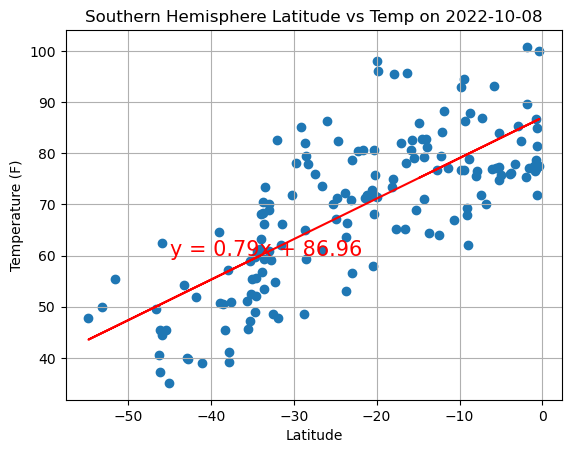

In [21]:
x_values = southern_df["Latitude"]
y_values = southern_df["Temperature"]
regEQplotX = -45
regEQplotY = 60
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

The r-square is -0.8522762038222382
y = -0.86x + 92.97


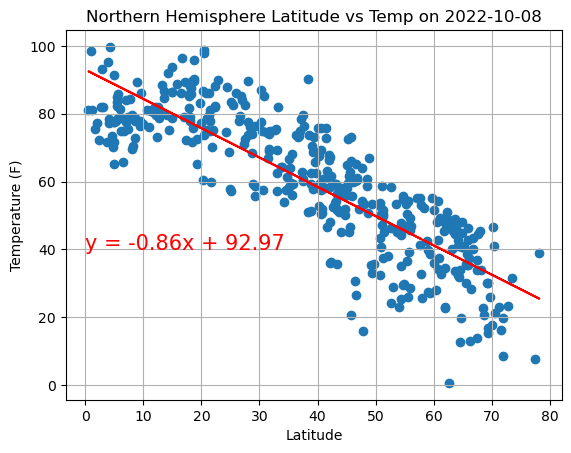

In [22]:
#set the data sets to compare
x_values = northern_df["Latitude"]
y_values = northern_df["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

Insights:

The scatter plots of Northern and Southern randomly-selected-cities' temperature against their latitude.

The result shows a strong correlation between distance from the equator and temperature. As it can be seen, the closer to the equator one gets, the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.17831821640553103
y = 0.18x + 65.25


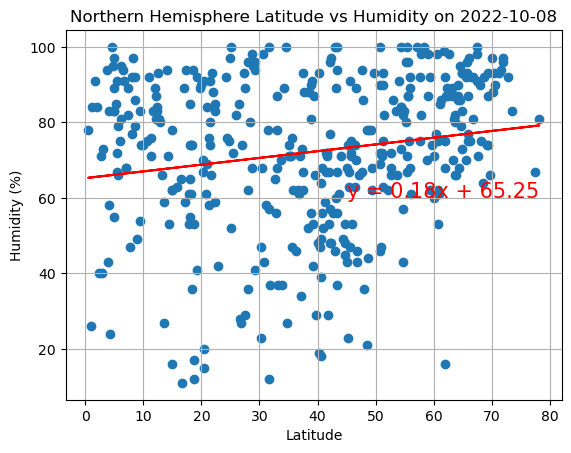

In [23]:
#set the data sets to compare
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
regEQplotX = 45
regEQplotY = 60
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.0070189844127663175
y = 0.01x + 66.49


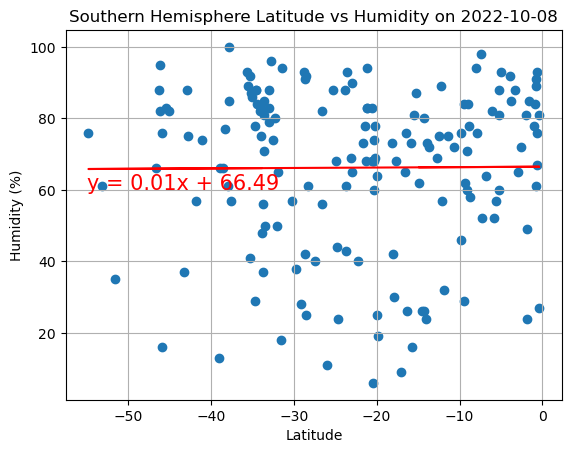

In [24]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
regEQplotX = -55
regEQplotY = 60
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

In [25]:
Insights: The scatter plot maps of Northern and Southern cities' humidity against their latitude. Cities selected randomly.

The plot shows no apparent correlation between the two data sets.

SyntaxError: invalid syntax (138739860.py, line 1)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

Observations:
The scatter plot maps Northern and Southern hemisphere cities' cloudiness against their latitude. Cities selected randomly.
As previously mentioned on the humidity vs latitude graph, there seems to be no correlation between the two data sets.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.1159066004196804
y = 0.03x + 6.73


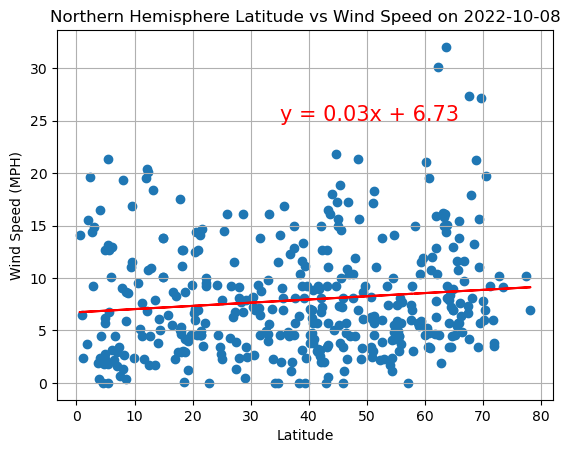

In [26]:
x_values = northern_df["Latitude"]
y_values = northern_df["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.21964430144970842
y = -0.1x + 8.13


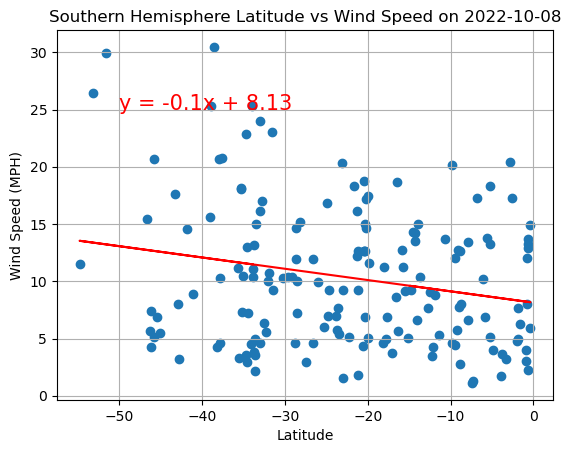

In [27]:
x_values = southern_df["Latitude"]
y_values = southern_df["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'/Users/razvan/Desktop/Bootcamp/Homework/API/python-api-challenge/output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

Observations: The scatter plot maps of Northern and Southern hemisphere cities' wind speed against their latitude. 

In both graphs it can be seen that although the difference is not that much, the closer you get to the equator, the less the wind speed is. However, the difference is not enough to be made a strong correlation between the two.